# Plotting example

In [11]:
from gawain.io import Reader

In [12]:
%matplotlib inline

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [14]:
data = Reader('alfven_wave')

In [15]:
data.variables

['density',
 'xmomentum',
 'ymomentum',
 'zmomentum',
 'energy',
 'xmag',
 'ymag',
 'zmag']

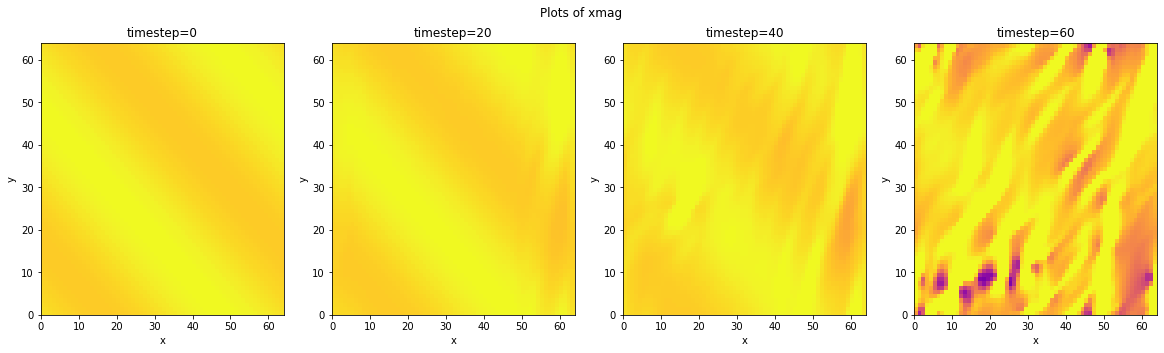

In [17]:
data.plot('xmag', timesteps=[0,20,40,60])

In [49]:
raw_data = data.get_data('density')

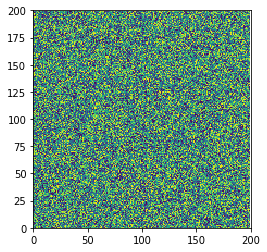

In [50]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 200))
ax.set_ylim((0, 200))

image = ax.imshow(np.random.random((200,200)))

In [51]:
# initialization function: plot the background of each frame
def init():
    image.set_data(np.random.random((200,200)))
    return (image,)

In [52]:
raw_data.shape

(66, 200, 200, 1)

In [53]:
# animation function. This is called sequentially
def animate(i):
    y = raw_data[i].reshape(200,200)
    image.set_data(y)
    return (image,)


In [58]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=67, interval=10, 
                               blit=True)

In [59]:
HTML(anim.to_jshtml())

IndexError: index 66 is out of bounds for axis 0 with size 66

In [8]:
data = Reader('sod_shock_tube')

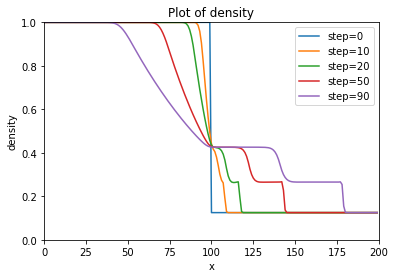

In [9]:
data.plot('density', timesteps=[0,10,20,50,90])

In [10]:
raw_data = data.get_data('density')

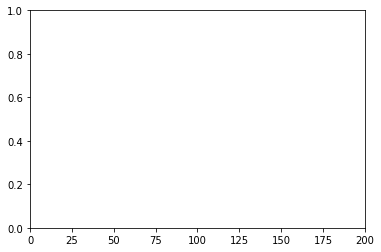

In [13]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 200))
ax.set_ylim((0, 1))

line, = ax.plot([], [], lw=2)

In [14]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [15]:
raw_data.shape

(101, 200, 1, 1)

In [19]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 200, 200)
    y = raw_data[i].reshape(200,)
    line.set_data(x, y)
    return (line,)


In [20]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [21]:
HTML(anim.to_jshtml())